In [1]:
import cloudstory as cs

In [2]:
cs.create_bucket('cloudstory-demo')

'Created or already exists cloudstory-demo bucket.'

In [3]:
cs.list_buckets(match='cloud')

Existing buckets containing "cloud" string:
  cloudstory
  cloudstory-demo
  cloudtrail-awslogs-858131396919-isengard-do-not-delete
  gobuildcloud
  golearncloud
  mobilewithcloud-20190331222311-deployment
  open-data-on-cloud


In [4]:
cs.list_bucket_contents(bucket='nyc-tlc', match='2018', size_mb=250)

trip data/green_tripdata_2018-01.csv ( 68MB)
trip data/green_tripdata_2018-02.csv ( 66MB)
trip data/green_tripdata_2018-03.csv ( 71MB)
trip data/green_tripdata_2018-04.csv ( 68MB)
trip data/green_tripdata_2018-05.csv ( 68MB)
trip data/green_tripdata_2018-06.csv ( 63MB)
trip data/green_tripdata_2018-07.csv ( 58MB)
trip data/green_tripdata_2018-08.csv ( 57MB)
trip data/green_tripdata_2018-09.csv ( 57MB)
trip data/green_tripdata_2018-10.csv ( 61MB)
trip data/green_tripdata_2018-11.csv ( 56MB)
trip data/green_tripdata_2018-12.csv ( 59MB)
Matched file size is 0.7GB with 12 files
Bucket nyc-tlc total size is 273.3GB with 251 files


In [5]:
df = cs.preview_csv_dataset(bucket='nyc-tlc', key='trip data/green_tripdata_2018-02.csv', rows=100)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-02-01 00:39:38,2018-02-01 00:39:41,N,5,97,65,1,0.00,20.0,0.0,0.0,3.00,0.0,NaN,0.0,23.00,1,2
1,2,2018-02-01 00:58:28,2018-02-01 01:05:35,N,1,256,80,5,1.60,7.5,0.5,0.5,0.88,0.0,NaN,0.3,9.68,1,1
2,2,2018-02-01 00:56:05,2018-02-01 01:18:54,N,1,25,95,1,9.60,28.5,0.5,0.5,5.96,0.0,NaN,0.3,35.76,1,1
3,2,2018-02-01 00:12:40,2018-02-01 00:15:50,N,1,61,61,1,0.73,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2,1
4,2,2018-02-01 00:45:18,2018-02-01 00:51:56,N,1,65,17,2,1.87,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1


In [6]:
cs.copy_among_buckets(from_bucket='nyc-tlc', from_key='trip data/green_tripdata_2018-02.csv',
                      to_bucket='cloudstory-demo', to_key='few-trips/trips-2018-02.csv')

File few-trips/trips-2018-02.csv already exists in S3 bucket cloudstory-demo


In [7]:
df = cs.s3_select(bucket='open-data-analytics-taxi-trips', key='few-trips/trips-2018-02.csv', 
          statement="""
          select passenger_count, payment_type, trip_distance 
          from s3object s 
          where s.passenger_count = '4' 
          limit 100
          """)

Scanned:  1.72MB
Processed:  1.71MB
Returned:  0.01MB


In [8]:
df.head()

,passenger_count,payment_type,trip_distance
0,4,1,7.20
1,4,1,1.05
2,4,1,0.63
3,4,2,8.41
4,4,2,1.38


In [9]:
df = cs.s3_select(bucket='nyc-tlc', key='trip data/green_tripdata_2018-02.csv', 
          statement="""
          select passenger_count, payment_type, trip_distance 
          from s3object s 
          where s.passenger_count = '4' 
          limit 100
          """)

Scanned:  1.72MB
Processed:  1.71MB
Returned:  0.01MB


In [10]:
df.head()

,passenger_count,payment_type,trip_distance
0,4,1,7.20
1,4,1,1.05
2,4,1,0.63
3,4,2,8.41
4,4,2,1.38


In [11]:
cs.list_bucket_contents(bucket='nyc-tlc', match='2018')

trip data/fhv_tripdata_2018-01.csv (1337MB)
trip data/fhv_tripdata_2018-02.csv (1307MB)
trip data/fhv_tripdata_2018-03.csv (1486MB)
trip data/fhv_tripdata_2018-04.csv (1425MB)
trip data/fhv_tripdata_2018-05.csv (1459MB)
trip data/fhv_tripdata_2018-06.csv (1430MB)
trip data/fhv_tripdata_2018-07.csv (1463MB)
trip data/fhv_tripdata_2018-08.csv (1498MB)
trip data/fhv_tripdata_2018-09.csv (1501MB)
trip data/fhv_tripdata_2018-10.csv (1578MB)
trip data/fhv_tripdata_2018-11.csv (1550MB)
trip data/fhv_tripdata_2018-12.csv (1616MB)
trip data/green_tripdata_2018-01.csv ( 68MB)
trip data/green_tripdata_2018-02.csv ( 66MB)
trip data/green_tripdata_2018-03.csv ( 71MB)
trip data/green_tripdata_2018-04.csv ( 68MB)
trip data/green_tripdata_2018-05.csv ( 68MB)
trip data/green_tripdata_2018-06.csv ( 63MB)
trip data/green_tripdata_2018-07.csv ( 58MB)
trip data/green_tripdata_2018-08.csv ( 57MB)
trip data/green_tripdata_2018-09.csv ( 57MB)
trip data/green_tripdata_2018-10.csv ( 61MB)
trip data/green_tripda

In [12]:
cs.preview_csv_dataset(bucket='nyc-tlc', key='trip data/yellow_tripdata_2018-06.csv')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.00,1,N,145,145,2,3.0,0.5,0.5,0.00,0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.00,1,N,230,161,1,5.5,0.5,0.5,1.35,0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.30,1,N,100,263,2,13.0,0.5,0.5,0.00,0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0,0.3,3.80
5,1,2018-06-01 00:09:00,2018-06-01 00:24:01,1,2.00,1,N,161,234,1,11.5,0.5,0.5,2.55,0,0.3,15.35
6,1,2018-06-01 00:02:33,2018-06-01 00:13:01,2,1.50,1,N,163,233,1,8.5,0.5,0.5,1.95,0,0.3,11.75
7,1,2018-06-01 00:13:23,2018-06-01 00:16:52,1,0.70,1,N,186,246,1,5.0,0.5,0.5,1.85,0,0.3,8.15
8,1,2018-06-01 00:24:29,2018-06-01 01:08:43,1,5.70,1,N,230,179,2,22.0,0.5,0.5,0.00,0,0.3,23.30
9,2,2018-06-01 00:17:01,2018-06-01 00:23:16,1,0.85,1,N,179,223,2,6.0,0.5,0.5,0.00,0,0.3,7.30


In [13]:
cs.copy_among_buckets(from_bucket='nyc-tlc', from_key='trip data/yellow_tripdata_2018-06.csv',
                      to_bucket='cloudstory-demo', to_key='many-trips/trips-2018-06.csv')

File many-trips/trips-2018-06.csv already exists in S3 bucket cloudstory-demo


In [14]:
cs.list_bucket_contents(bucket='cloudstory-demo', match='trips/trips')

few-trips/trips-2018-02.csv ( 66MB)
many-trips/trips-2018-06.csv (734MB)
Matched file size is 0.8GB with 2 files
Bucket cloudstory-demo total size is 0.8GB with 6 files


In [15]:
cs.list_glue_databases()

default
odoc
sampledb
taxicatalog


In [16]:
cs.list_glue_tables('taxicatalog', verbose=False)

**Table: many_trips**

Location: s3://open-data-analytics-taxi-trips/many-trips/

Created by: AWS-Crawler

**Table: many_trips_well_formed**

Location: s3://open-data-analytics-taxi-trips/many-trips-well-formed

Created by: manav

In [17]:
output_bucket = 'cloudstory-demo'
folder = 'queries'
query = 'SELECT * FROM "taxicatalog"."many_trips_well_formed" TABLESAMPLE BERNOULLI(100) LIMIT 1000;'

df = cs.athena_query(query, output_bucket, folder)
df.head()

,vendor,passengers,distance,rate,pick_location,drop_location,payment_type,fare,extra_fare,tax,tip,toll,surcharge,total_fare,pick_when,drop_when
0,1,1,0.90,1,229,161,1,10.0,0.0,0.5,2.70,0.0,0.3,13.50,2018-06-19 09:10:56,2018-06-19 09:25:58
1,1,1,1.80,1,142,236,1,10.5,0.0,0.5,2.80,0.0,0.3,14.10,2018-06-19 09:37:58,2018-06-19 09:50:57
2,1,1,1.50,1,236,237,1,7.0,0.0,0.5,1.55,0.0,0.3,9.35,2018-06-19 09:54:30,2018-06-19 10:01:38
3,2,1,1.86,1,231,234,2,11.0,0.0,0.5,0.00,0.0,0.3,11.80,2018-06-19 09:08:03,2018-06-19 09:23:05
4,2,1,0.98,1,79,144,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30,2018-06-19 09:42:31,2018-06-19 09:49:20


In [18]:
df = df.drop(columns=['surcharge'])

In [19]:
corr = df.corr()
corr

,vendor,passengers,distance,rate,pick_location,drop_location,payment_type,fare,extra_fare,tax,tip,toll,total_fare
vendor,1.000000,0.217379,0.066786,0.009710,-0.030975,-0.017031,-0.057138,0.069351,NaN,0.019491,0.056852,0.002501,0.064944
passengers,0.217379,1.000000,0.024276,0.033657,-0.009088,-0.014795,-0.001576,0.017819,NaN,-0.033466,0.006688,-0.006065,0.014307
distance,0.066786,0.024276,1.000000,0.293480,-0.034460,-0.020598,-0.076609,0.888252,NaN,-0.092010,0.651208,0.731975,0.893147
rate,0.009710,0.033657,0.293480,1.000000,0.053725,0.044314,0.025018,0.461693,NaN,-0.595304,0.296839,0.421222,0.459089
pick_location,-0.030975,-0.009088,-0.034460,0.053725,1.000000,0.101859,-0.003984,-0.011733,NaN,-0.038345,0.009760,-0.011116,-0.007675
drop_location,-0.017031,-0.014795,-0.020598,0.044314,0.101859,1.000000,-0.042072,-0.033498,NaN,-0.036314,0.000967,0.047540,-0.019813
payment_type,-0.057138,-0.001576,-0.076609,0.025018,-0.003984,-0.042072,1.000000,-0.090229,NaN,-0.108793,-0.476851,-0.053797,-0.165495
fare,0.069351,0.017819,0.888252,0.461693,-0.011733,-0.033498,-0.090229,1.000000,NaN,-0.120350,0.706551,0.701522,0.985466
extra_fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,0.019491,-0.033466,-0.092010,-0.595304,-0.038345,-0.036314,-0.108793,-0.120350,NaN,1.000000,-0.093974,-0.279059,-0.139070


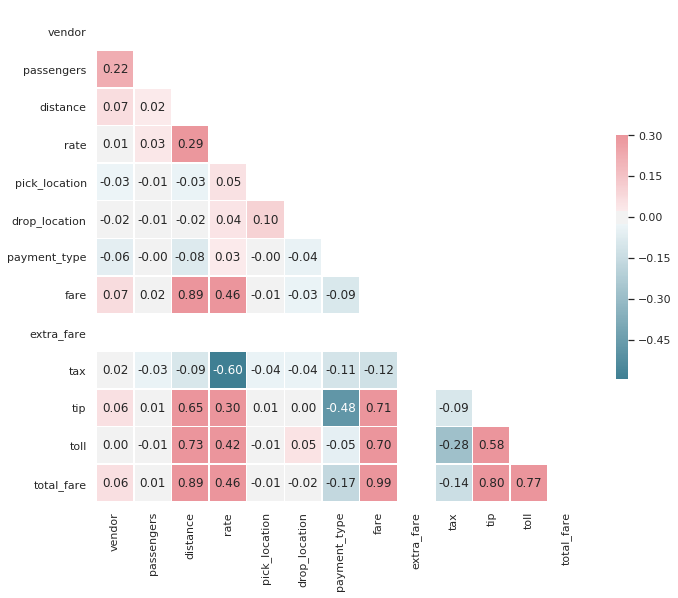

In [20]:
cs.heatmap(corr)

In [22]:
image_bucket = 'open-data-analytics-taxi-trips'
cs.show_image(image_bucket, 'images/traffic-in-manhattan.jpg', 1024)

In [23]:
cs.image_labels(image_bucket, 'images/traffic-in-manhattan.jpg')

Vehicle (100%)
Car (100%)
Transportation (100%)
Automobile (100%)
Human (99%)
Person (99%)
Truck (98%)
Machine (96%)
Wheel (96%)
Footwear (87%)
Clothing (87%)
Apparel (87%)
Shoe (87%)
Road (75%)
Traffic Jam (73%)
Town (73%)
City (73%)
Building (73%)
Urban (73%)
Metropolis (73%)
Taxi (71%)
Cab (71%)
Light (68%)
Traffic Light (68%)
Neighborhood (62%)
People (62%)
Pedestrian (59%)


In [25]:
cs.image_label_count(image_bucket, 'images/traffic-in-manhattan.jpg', 'Car')

Found Car 9 times.


In [26]:
cs.image_label_count(image_bucket, 'images/traffic-in-manhattan.jpg', 'Truck')

Found Truck 4 times.


In [27]:
cs.image_label_count(image_bucket, 'images/traffic-in-manhattan.jpg', 'Person')

Found Person 8 times.


In [28]:
cs.show_image(image_bucket, 'images/nyc-taxi-signs.jpeg', 1024)

In [29]:
cs.image_text(image_bucket, 'images/nyc-taxi-signs.jpeg', sort_column='Top', parents=False)

,Confidence,DetectedText,Id,ParentId,Type,Width,Height,Left,Top
14,91.874588,WAY,15,1.0,WORD,0.028470,0.019385,0.599400,0.109109
15,83.133957,6ASW,14,1.0,WORD,0.034089,0.018404,0.570143,0.126126
17,94.518997,HAN'S,17,2.0,WORD,0.070971,0.032111,0.388597,0.187187
16,99.643578,DELI,16,2.0,WORD,0.080892,0.041151,0.281320,0.201201
18,90.439896,&,18,3.0,WORD,0.027007,0.044044,0.364591,0.212212
19,99.936119,GROCERY,19,3.0,WORD,0.150999,0.042149,0.399850,0.217217
20,87.067184,iGi,20,4.0,WORD,0.026257,0.023023,0.595649,0.265265
21,95.180290,SHOES,21,5.0,WORD,0.041695,0.019078,0.621906,0.269269
22,91.584435,X29CONEYSL,23,5.0,WORD,0.108448,0.038509,0.887472,0.279279
23,90.353638,x29,24,5.0,WORD,0.038896,0.033245,0.888972,0.282282


In [30]:
cs.show_image(image_bucket, 'images/world-leaders.jpg', 1024)

In [31]:
cs.detect_celebs(image_bucket, 'images/world-leaders.jpg', sort_column='Left')

,Id,MatchConfidence,Name,Urls,Width,Height,Left,Top
3,4Ev8IX1,100.0,Chulabhorn,[],0.020202,0.038973,0.015152,0.424905
5,3J795K,100.0,Manmohan Singh,[],0.018687,0.035171,0.131313,0.420152
25,f0JR5e,90.0,Mahinda Rajapaksa,[],0.016162,0.030418,0.145960,0.319392
30,3n7tl2O,88.0,Killah Priest,[www.imdb.com/name/nm0697334],0.014646,0.027567,0.162121,0.290875
12,2gC0Tc0e,100.0,Rosen Plevneliev,[],0.018182,0.034221,0.179293,0.367871
19,3LR2lb6j,56.0,Jerry Harrison,[],0.017172,0.032319,0.227273,0.330798
1,4hD40O,100.0,Thomas Boni Yayi,[],0.021717,0.040875,0.236364,0.399240
22,2F5LV4,63.0,Irwansyah,[www.imdb.com/name/nm2679097],0.016667,0.031369,0.274747,0.340304
8,3hk2qj5G,98.0,Cristina Fernández de Kirchner,[www.imdb.com/name/nm3231417],0.018687,0.035171,0.278283,0.414449
13,2sN1oC8s,100.0,Jorge Carlos Fonseca,[],0.018182,0.034221,0.280808,0.370722


In [32]:
traffic_update = """
It is snowing and windy today in New York. The temperature is 50 degrees Fahrenheit. 
The traffic is slow 10 mph with several jams along the I-86.
"""

In [33]:
cs.comprehend_syntax(traffic_update)

,BeginOffset,EndOffset,Text,TokenId,Tag,Score
0,1,3,It,1,PRON,0.999971
1,4,6,is,2,VERB,0.557677
2,7,14,snowing,3,ADJ,0.687805
3,15,18,and,4,CONJ,0.999998
4,19,24,windy,5,ADJ,0.994336
5,25,30,today,6,NOUN,0.999980
6,31,33,in,7,ADP,0.999924
7,34,37,New,8,PROPN,0.999351
8,38,42,York,9,PROPN,0.998399
9,42,43,.,10,PUNCT,0.999998


In [34]:
cs.comprehend_entities(traffic_update)

,BeginOffset,EndOffset,Score,Text,Type
0,25,30,0.839589,today,DATE
1,34,42,0.998423,New York,LOCATION
2,63,84,0.984396,50 degrees Fahrenheit,QUANTITY
3,107,113,0.992498,10 mph,QUANTITY
4,142,146,0.990993,I-86,LOCATION


In [35]:
cs.comprehend_phrases(traffic_update)

,BeginOffset,EndOffset,Score,Text
0,25,30,0.988285,today
1,34,42,0.997397,New York
2,44,59,0.999752,The temperature
3,63,73,0.789843,50 degrees
4,87,98,0.999843,The traffic
5,107,113,0.924737,10 mph
6,119,131,0.998428,several jams
7,138,146,0.997108,the I-86


In [36]:
cs.comprehend_sentiment(traffic_update)

{'Positive': 0.04090394824743271,
 'Negative': 0.3745909333229065,
 'Neutral': 0.5641733407974243,
 'Mixed': 0.020331736654043198}

In [37]:
bucket='cloudstory'
key='notebooks-media/alexa-for-business-people.mp4'

cs.show_video(bucket, key)

In [38]:
jobId = cs.video_labels_job(bucket, key)
jobId

'd3c19ca3e77238ebc2d1a56115a4a72069aecd9afe678c661a43880b7af78ea0'

In [39]:
df = cs.video_labels_result(jobId)
df.head(10)

'In Progress...'

'Getting Labels...'

'Video Duration (ms): 11345'

'FrameRate: 23'

'Succeeded in detecting 1256 labels.'

,Timestamp,LabelName,Score,Instances,ParentsCount,Parents
0,0,Apparel,66.54,0,0,
1,0,Audience,50.53,0,2,"Crowd, Person"
2,0,Building,60.53,0,0,
3,0,Clothing,66.54,0,0,
4,0,Coat,66.54,0,1,Clothing
5,0,Computer,82.03,0,1,Electronics
6,0,Conference Room,86.87,0,2,"Indoors, Room"
7,0,Crowd,54.35,0,1,Person
8,0,Electronics,82.03,0,0,
9,0,Furniture,76.07,0,0,


In [42]:
text = cs.video_labels_text(df)
text[500:1000]

'nce Room Crowd Electronics Furniture Hardware Human Indoors Interview Meeting Room Mouse Office Office Building Overcoat People Person Room Sitting Speech Suit Table Apparel Audience Building Clothing Coat Computer Conference Room Crowd Electronics Furniture Hardware Human Indoors Interview Meeting Room Mouse Office Office Building Overcoat People Person Room Sitting Speech Suit Table Apparel Audience Building Clothing Coat Computer Conference Room Crowd Electronics Furniture Hardware Human Indo'

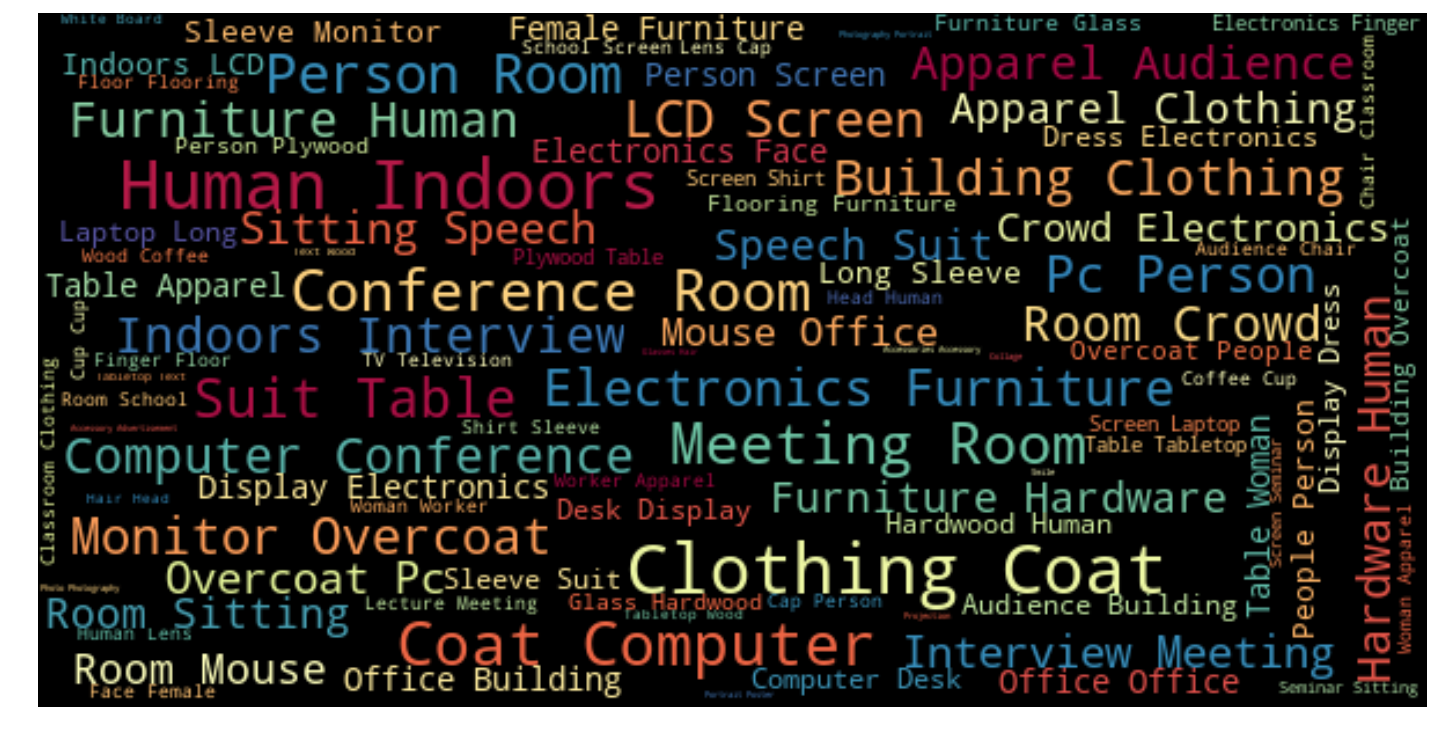

In [43]:
cs.video_labels_wordcloud(text)

In [44]:
cs.video_labels_search(df, 'LabelName', 'Person')

,Timestamp,LabelName,Score,Instances,ParentsCount,Parents
20,0,Person,99.76,4,0,
46,166,Person,99.76,4,0,
72,375,Person,99.76,4,0,
98,583,Person,99.76,4,0,
125,792,Person,99.77,4,0,
151,959,Person,99.77,4,0,
176,1167,Person,99.77,4,0,
198,1376,Person,99.73,4,0,
215,1584,Person,99.69,4,0,
228,1793,Person,99.65,2,0,


In [46]:
cs.video_labels_search(df, 'Parents', 'Computer')

,Timestamp,LabelName,Score,Instances,ParentsCount,Parents
15,0,Mouse,82.03,1,3,"Computer, Hardware, Electronics"
41,166,Mouse,83.93,1,3,"Computer, Electronics, Hardware"
67,375,Mouse,85.22,1,3,"Electronics, Hardware, Computer"
93,583,Mouse,87.57,1,3,"Hardware, Electronics, Computer"
119,792,Mouse,89.41,1,3,"Hardware, Computer, Electronics"
123,792,Pc,50.10,0,2,"Computer, Electronics"
146,959,Mouse,89.70,1,3,"Hardware, Computer, Electronics"
172,1167,Mouse,90.15,1,3,"Computer, Hardware, Electronics"
195,1376,Mouse,73.25,1,3,"Electronics, Computer, Hardware"
214,1584,Mouse,55.04,1,3,"Computer, Hardware, Electronics"


In [47]:
cs.video_label_stats(df, 'Person')

Displaying stats on number of instances for label "Person"


,Timestamp,Score,Instances,ParentsCount
count,55.000000,55.000000,55.000000,55.0
mean,5633.072727,97.434545,4.145455,0.0
std,3366.954899,8.072887,2.197795,0.0
min,0.000000,60.300000,2.000000,0.0
25%,2689.500000,99.250000,3.000000,0.0
50%,5797.000000,99.690000,4.000000,0.0
75%,8487.000000,99.770000,4.000000,0.0
max,11177.000000,99.870000,12.000000,0.0
